In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import meanderpy as mp ## https://github.com/zsylvester/meanderpy
from importlib import reload
reload(mp)
import matplotlib as mpl

cran = np.random.normal(3, 0.5, 50)    #crdist
mran = np.random.normal(60.0/(365*24*60*60.0), 10.0/(365*24*60*60.0), 50)   #migration
aran = np.random.normal(2e-9, 1e-8, 50)   #aggradation

v1 = np.array(cran)
v2 = np.array(mran)
v3 = np.array(aran)


for i in range(50):
    nit = 1000                   # number of iterations
    W = 500.0                    # channel width (m)
    D = 10.0                      # channel depth (m)
    depths = D * np.ones((nit,))  # channel depths for different iterations  
    pad = 5000                    # padding (number of nodepoints along centerline)
    deltas = 500.0                # sampling distance along centerline           
    Cfs = 0.031 * np.ones((nit,)) # dimensionless Chezy friction factor
    crdist = v1[i] * W                # threshold distance at which cutoffs occur
    kl = v2[i]                     # migration rate constant (m/s)
    kv =  1.0e-12               # vertical slope-dependent erosion rate constant (m/s)
    dt = 1*0.05*365*24*60*60.0*.1     # time step (s)
    dens = 1000                  # density of water (kg/m3)
    saved_ts = 5                # which time steps will be saved
    n_bends = 15                 # approximate number of bends you want to model
    Sl = 0.0                     # initial slope (matters more for submarine channels than rivers)
    t1 = 0                    # time step when incision starts
    t2 = 0                    # time step when lateral migration starts
    t3 = 0                    # time step when aggradation starts
    aggr_factor = v3[i]        # aggradation factor (m/s, about 0.18 m/year, it kicks in after t3)
    
    os.chdir(r"C:\\Users\Family PC\OneDrive - California Institute of Technology\river\Ucayali Centerlines")
    cl1=np.loadtxt('CL1.txt',delimiter=',')
    cl2=np.loadtxt('CL32.txt',delimiter=',')
    H=depths[0]
    y=cl1[:,0][::-1]*10
    x=cl1[:,1][::-1]*10
    z=np.zeros(len(x))

    ch=mp.Channel(x,y,z,W,H)
    chb=mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[])
    ch = mp.generate_initial_channel(W,D,Sl,deltas,pad,n_bends) # initialize channel
    chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration
    channel_coordinate = pd.DataFrame({"x":chb.channels[120].x, "y":chb.channels[120].y}) # the way it work is this: chb.channels[i].x will give you the x coordinates for the ith time step
    np.savetxt('OP%s.txt'% i, channel_coordinate, delimiter=',')



100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.15it/s]


In [13]:
for i in range(0,10):
    globals()['OP%s'% i] = pd.read_csv('{}{}{}'.format('OP',i,'.txt'), sep=",", header=None)
    #cl = pd.read_csv('{}{}{}'.format('CL',i,'.txt'), sep=",", header=None)


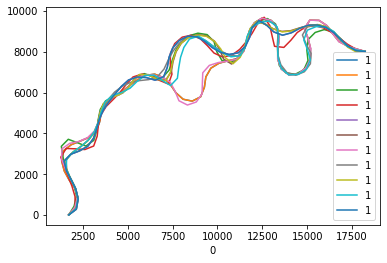

In [14]:
ax = OP0.plot(x =0, y=1)

for i in range(0,10):
    eval('{}{}'.format('OP',i)).plot(ax = ax, x =0, y=1)